## Imports

In [7]:
import pandas as pd

# Replace 'filename.csv' with the path to your local CSV file
df = pd.read_csv('heart-new.csv')

# Display the first few rows of the dataframe
print(df.head())

# Get the length of the dataset (number of samples)
dataset_length = len(df)

# Get the number of samples and features
num_samples, num_features = df.shape

# Print the dataset details
print(f"Dataset length: {dataset_length} samples")
print(f"Dataset shape: {num_samples} samples, {num_features} features")


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  
Dataset length: 303 samples
Dataset shape: 303 samples, 14 features


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

import pandas as pd
import numpy as np
import seaborn as sns
from random import random
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay, auc
# from imblearn.metrics import specificity_score, sensitivity_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [13]:

# Example usage for plotting confusion matrix
# Assuming you have a trained classifier and test data (clf, X_test, y_test)
# ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test).plot()

# Example usage for plotting ROC curve
# RocCurveDisplay.from_estimator(clf, X_test, y_test).plot()

df = pd.read_csv('heart.csv')

x = df.drop('Target', axis=1)
y = df['Target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=62)
df.head(10)



,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


<Axes: >

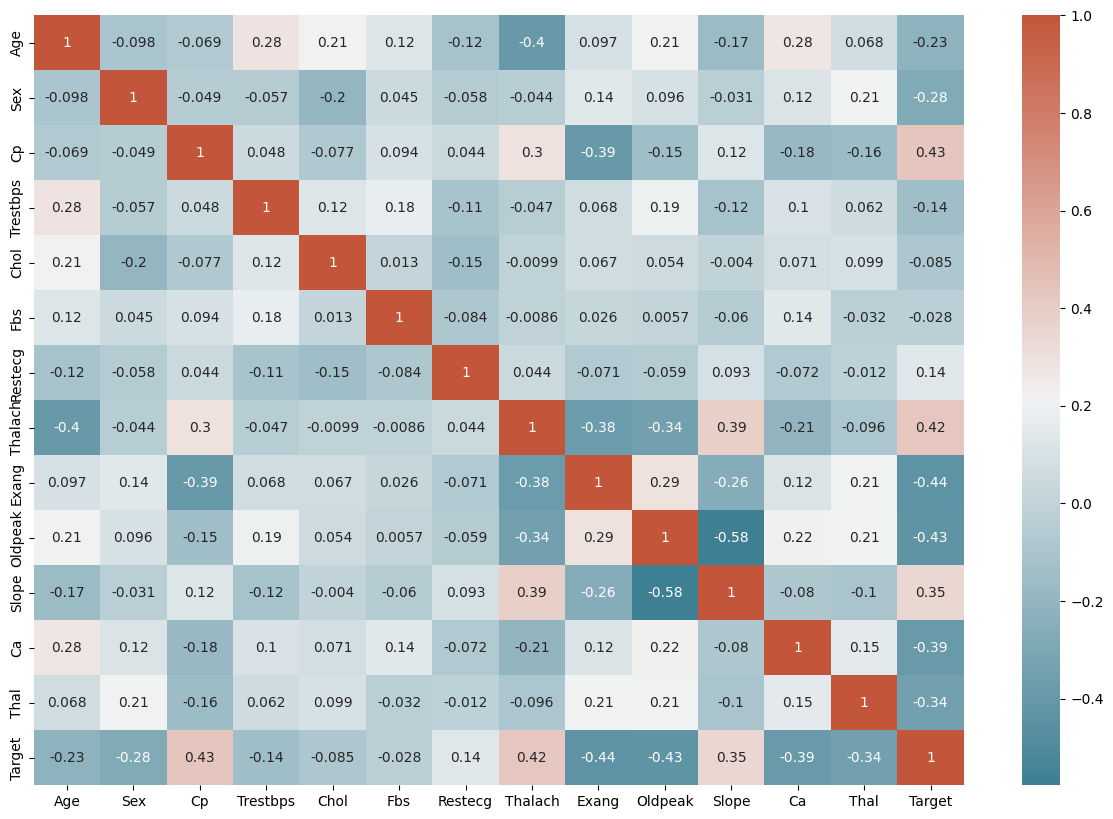

In [ ]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
# sns.heatmap(corr, xticklabels=corr.columns,
#             yticklabels=corr.columns,
#             annot=True,
#             cmap=sns.diverging_palette(220, 20, as_cmap=True))

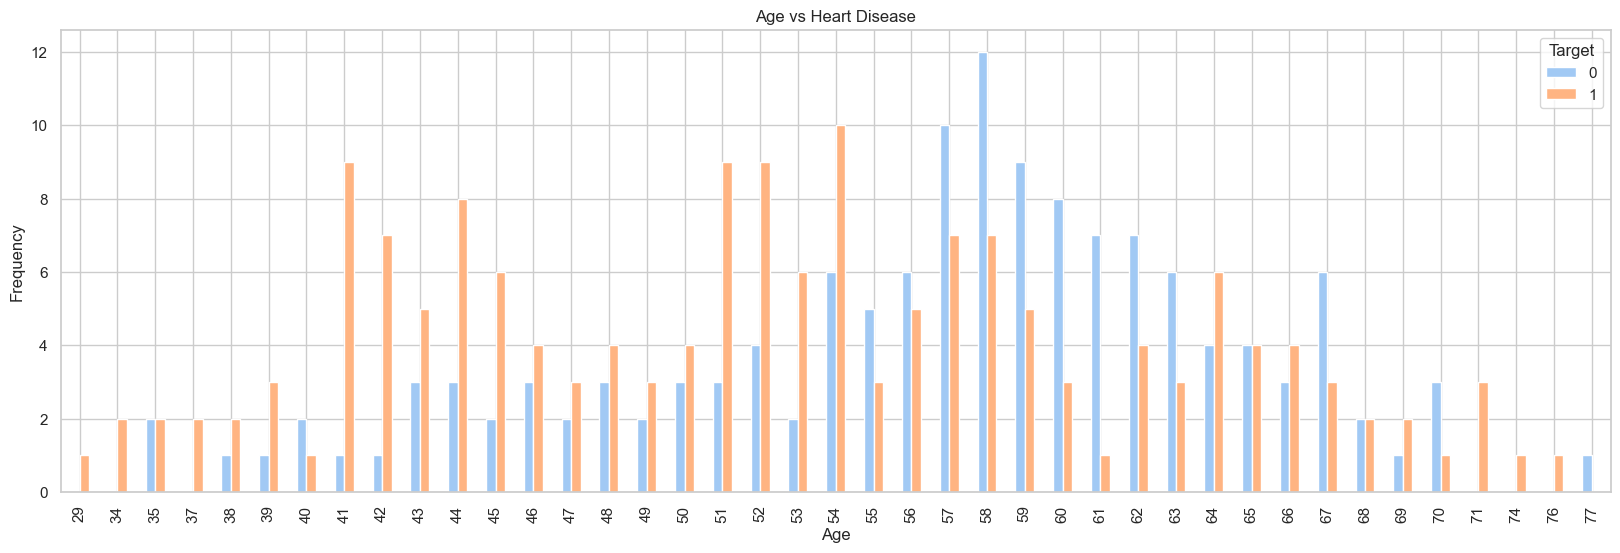

In [ ]:
mdf = pd.crosstab(df.Age,df.Target)
colors = sns.color_palette('pastel')[0:5]
mdf.plot(kind="bar",figsize=(20,6), color=colors)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age vs Heart Disease')
plt.show()


Text(0.5, 1.0, 'Gender vs Heart Disease\n')

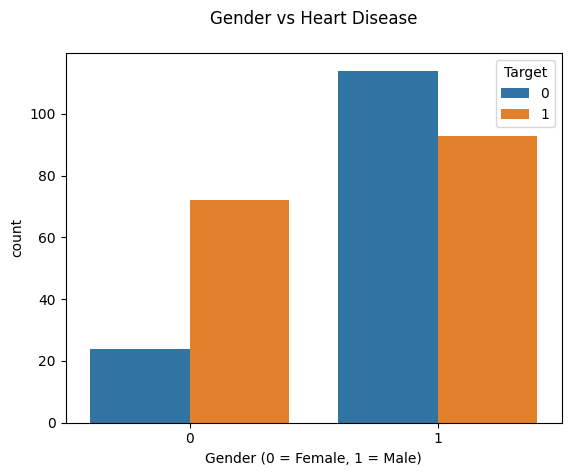

In [ ]:
sns.countplot(data= df, x='Sex',hue='Target')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.title('Gender vs Heart Disease\n')

Text(0.5, 1.0, 'ChestPainType vs Heart Disease\n')

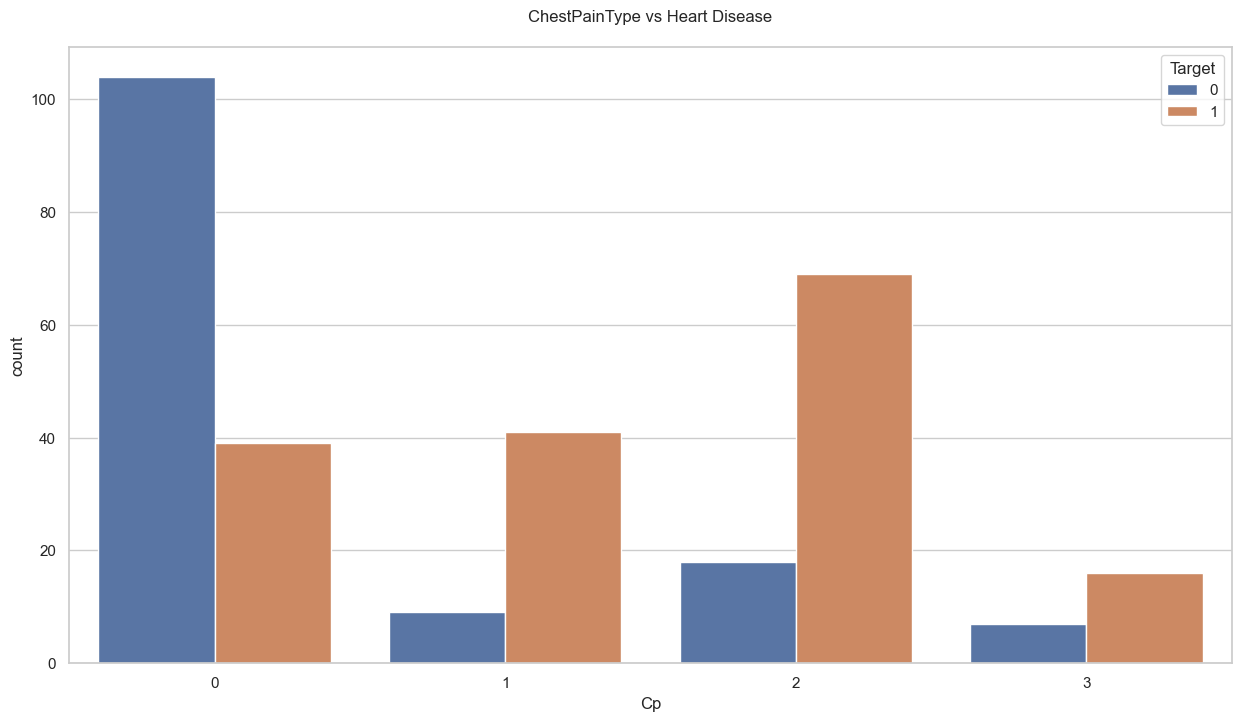

In [ ]:
sns.countplot(data= df, x='Cp',hue='Target')
plt.xlabel('Cp')
plt.title('ChestPainType vs Heart Disease\n')

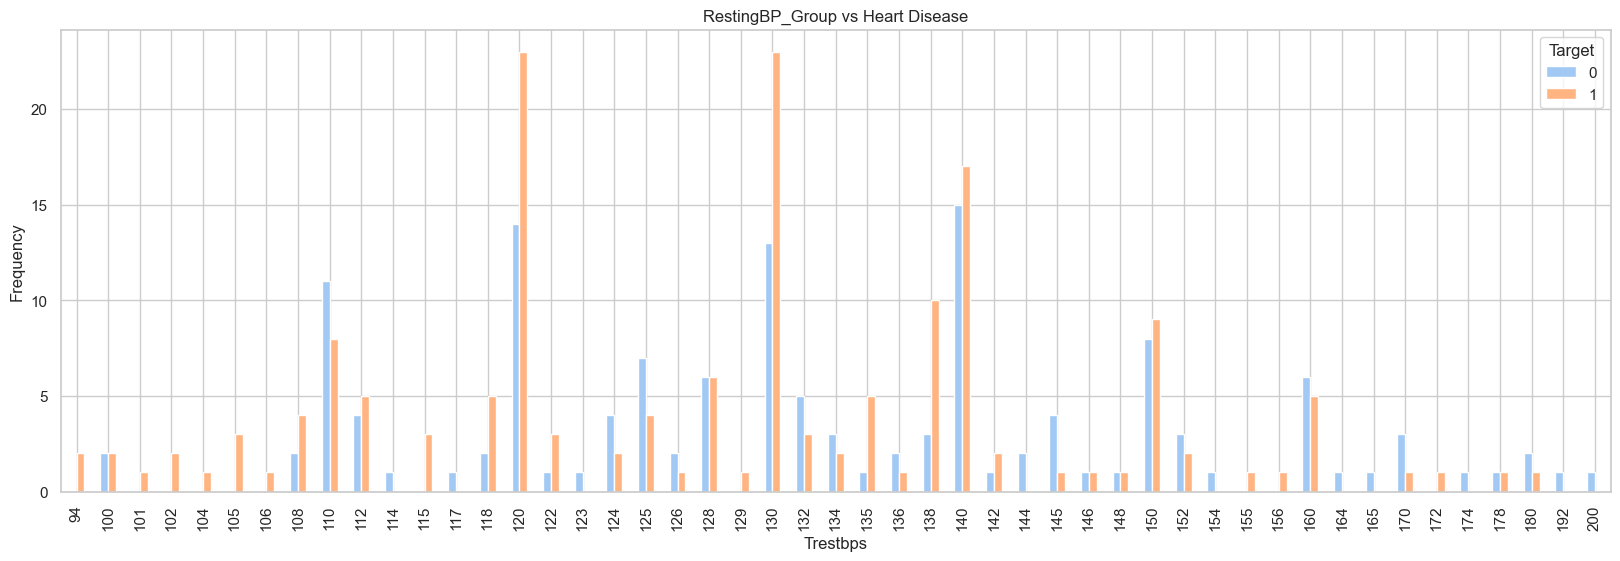

In [ ]:
mdf = pd.crosstab(df.Trestbps,df.Target)
colors = sns.color_palette('pastel')[0:5]
mdf.plot(kind="bar",figsize=(20,6), color=colors)
plt.xlabel('Trestbps')
plt.ylabel('Frequency')
plt.title('RestingBP_Group vs Heart Disease')
plt.show()


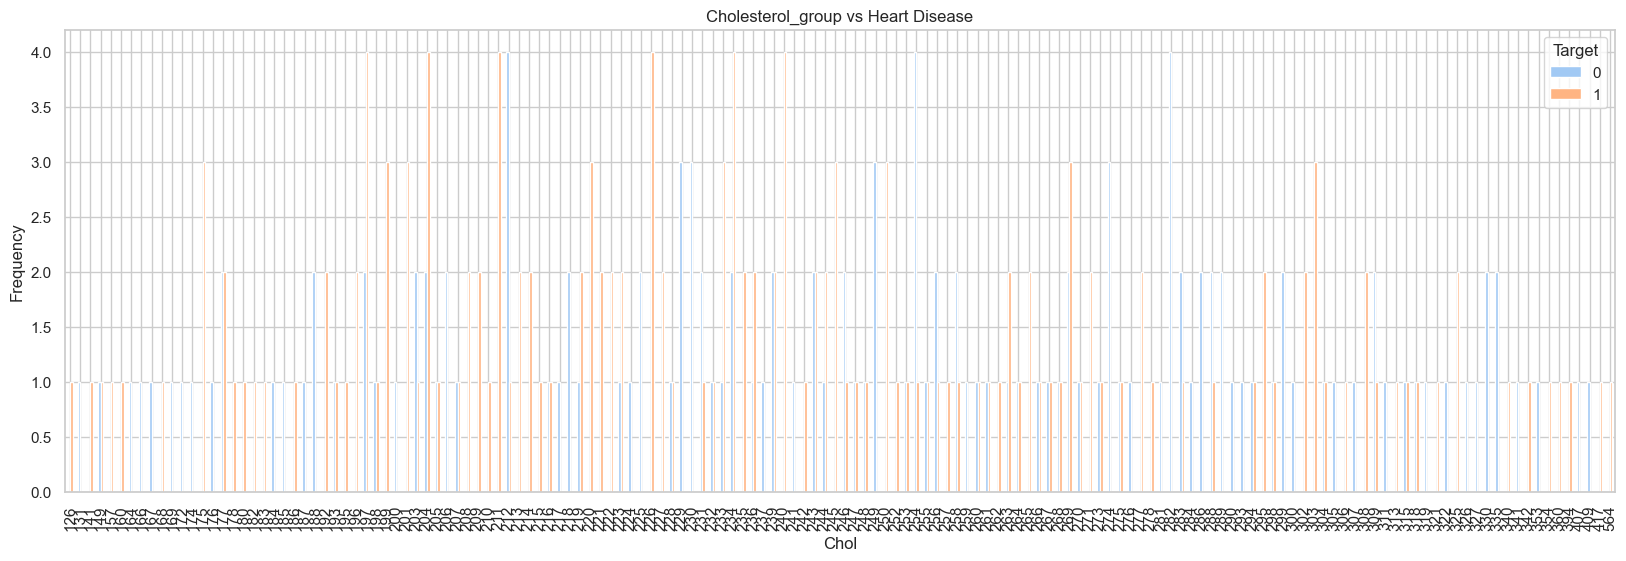

In [ ]:
mdf = pd.crosstab(df.Chol,df.Target)
colors = sns.color_palette('pastel')[0:5]
mdf.plot(kind="bar",figsize=(20,6), color=colors)
plt.xlabel('Chol')
plt.ylabel('Frequency')
plt.title('Cholesterol_group vs Heart Disease')
plt.show()


Text(0.5, 1.0, 'FastingBs vs target\n')

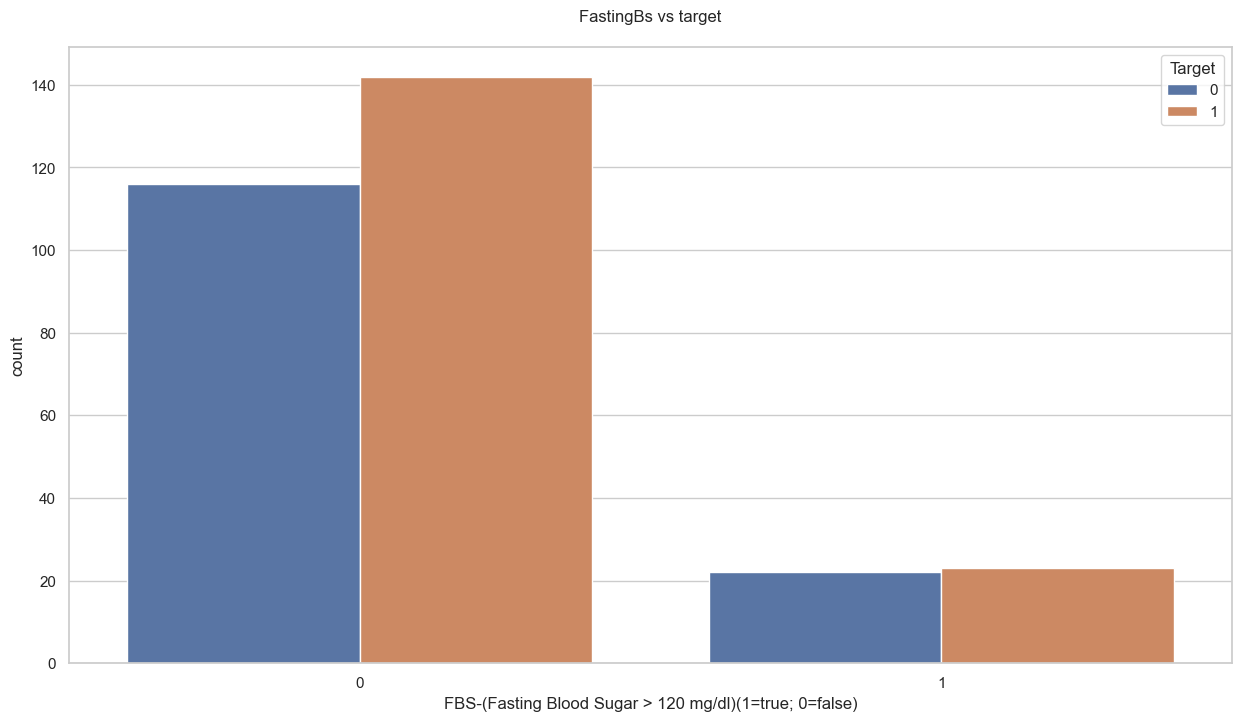

In [ ]:
sns.countplot(data= df, x='Fbs',hue='Target')
plt.xlabel('FBS-(Fasting Blood Sugar > 120 mg/dl)(1=true; 0=false)')
plt.title('FastingBs vs target\n')

Text(0.5, 1.0, 'Restecg v/s target\n')

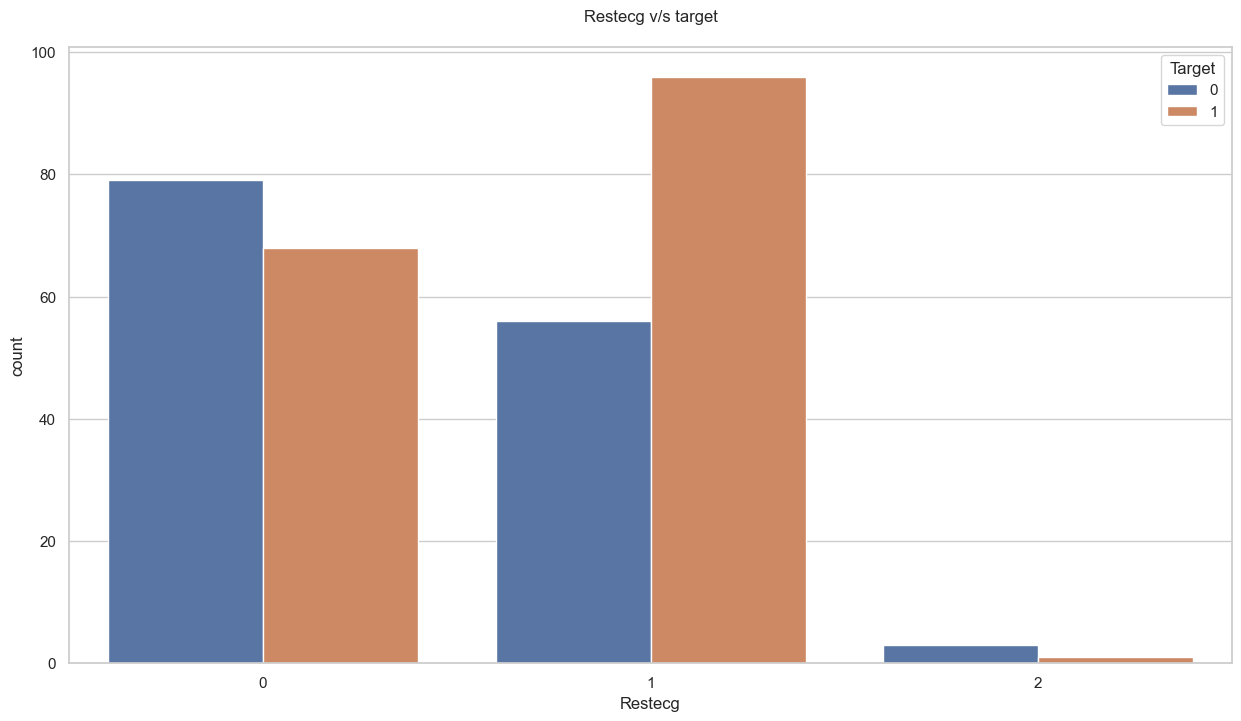

In [ ]:
sns.countplot(data= df, x='Restecg',hue='Target')
plt.xlabel('Restecg')
plt.title('Restecg v/s target\n')

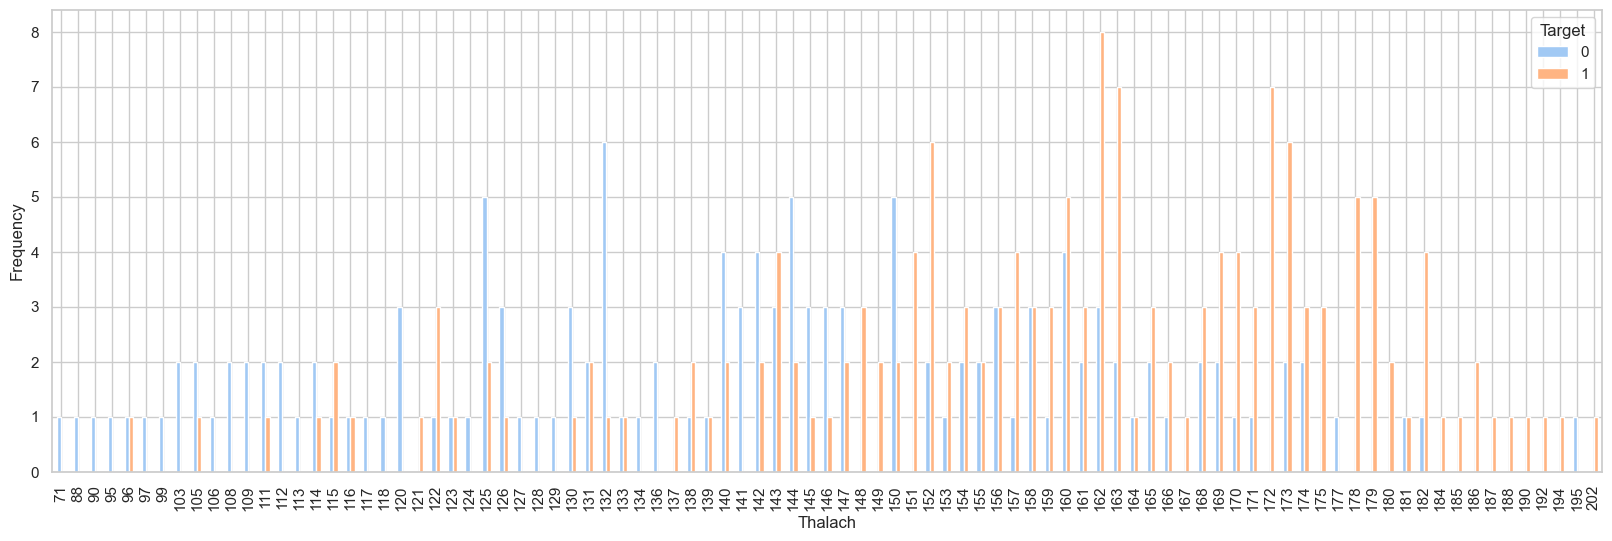

In [ ]:
mdf = pd.crosstab(df.Thalach,df.Target)
colors = sns.color_palette('pastel')[0:5]
mdf.plot(kind="bar",figsize=(20,6), color=colors)
plt.xlabel('Thalach')
plt.ylabel('Frequency')
plt.show()


Text(0.5, 1.0, 'Exang v/s target\n')

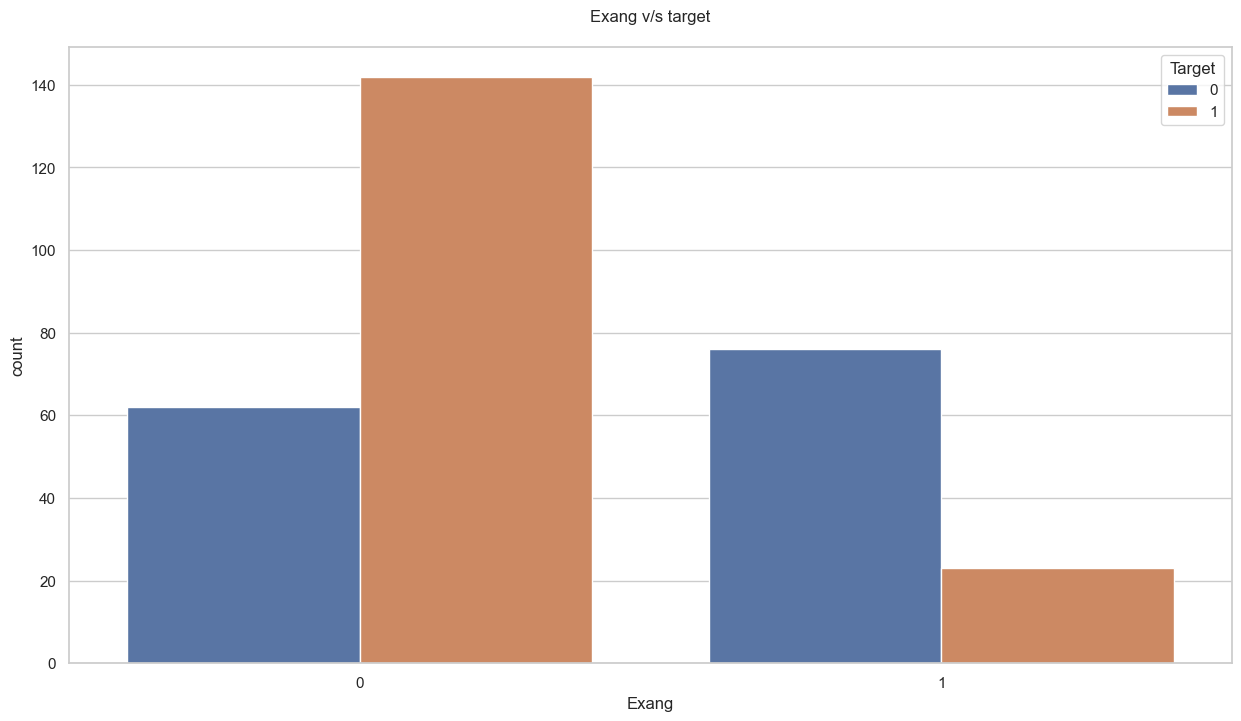

In [ ]:
sns.countplot(data= df, x='Exang',hue='Target')
plt.xlabel('Exang')
plt.title('Exang v/s target\n')

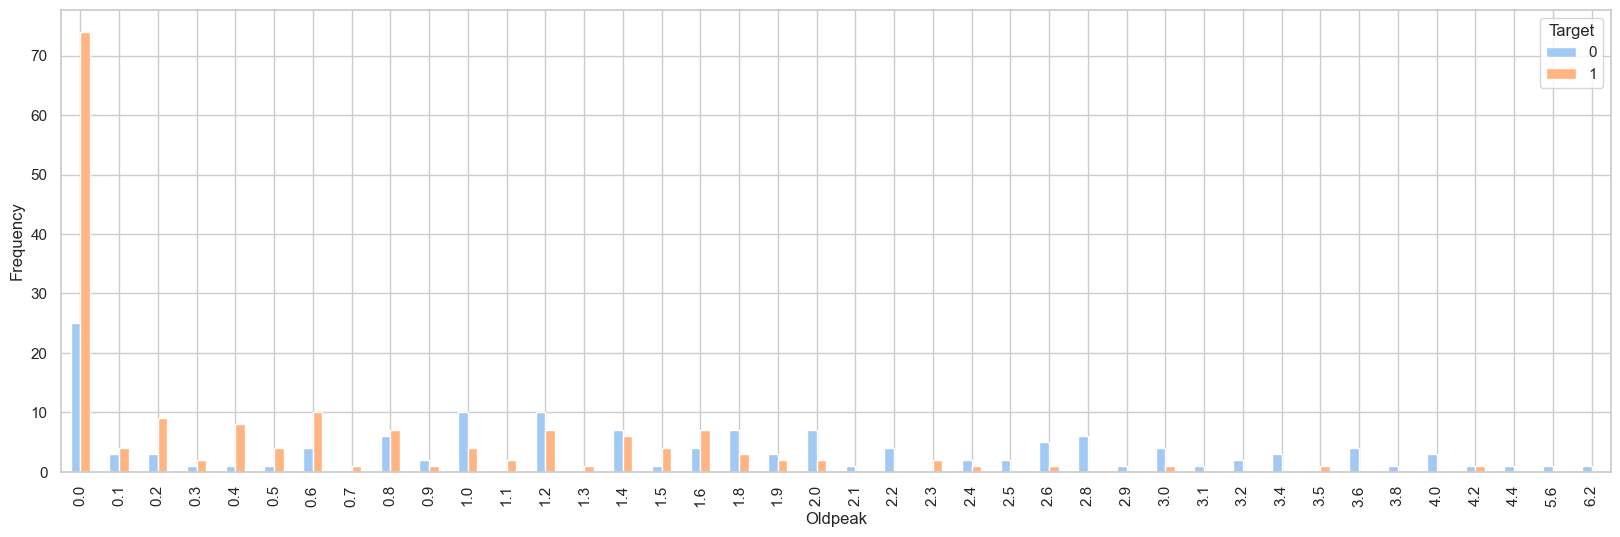

In [ ]:
mdf = pd.crosstab(df.Oldpeak,df.Target)
colors = sns.color_palette('pastel')[0:5]
mdf.plot(kind="bar",figsize=(20,6), color=colors)
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Slope v/s target\n')

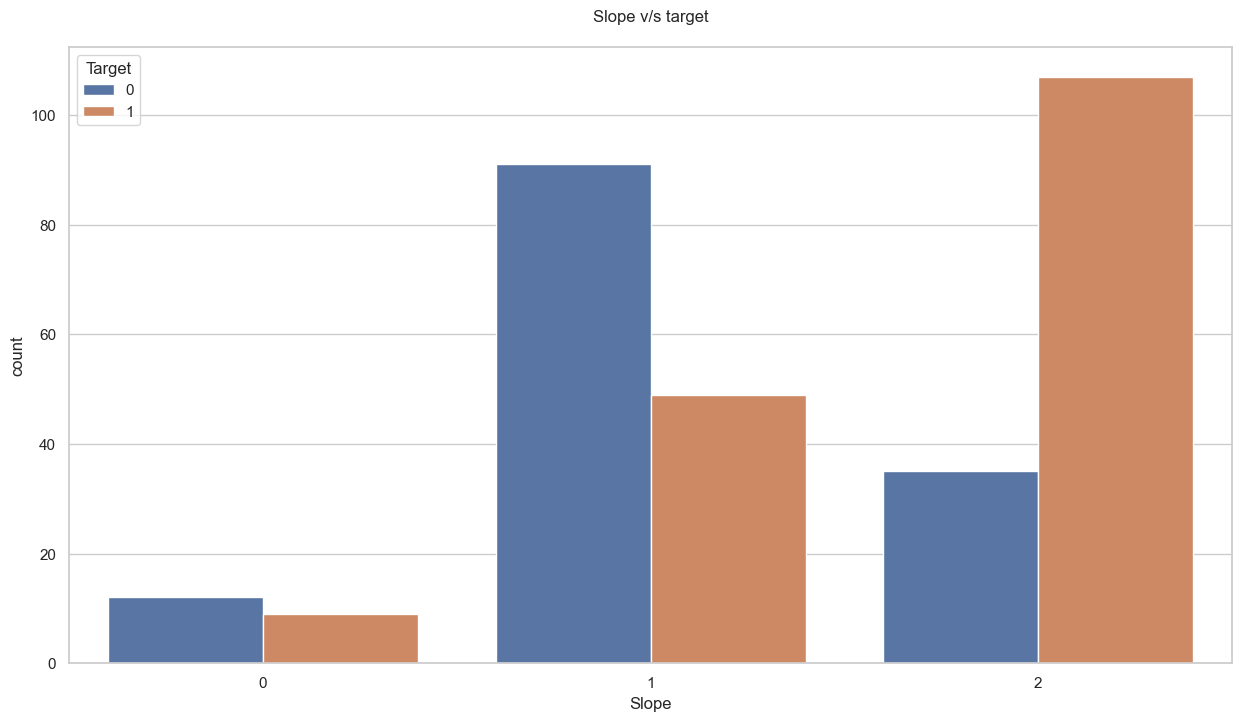

In [ ]:

sns.countplot(data= df, x='Slope',hue='Target')
plt.xlabel('Slope')
plt.title('Slope v/s target\n')

Text(0.5, 1.0, 'Ca v/s target\n')

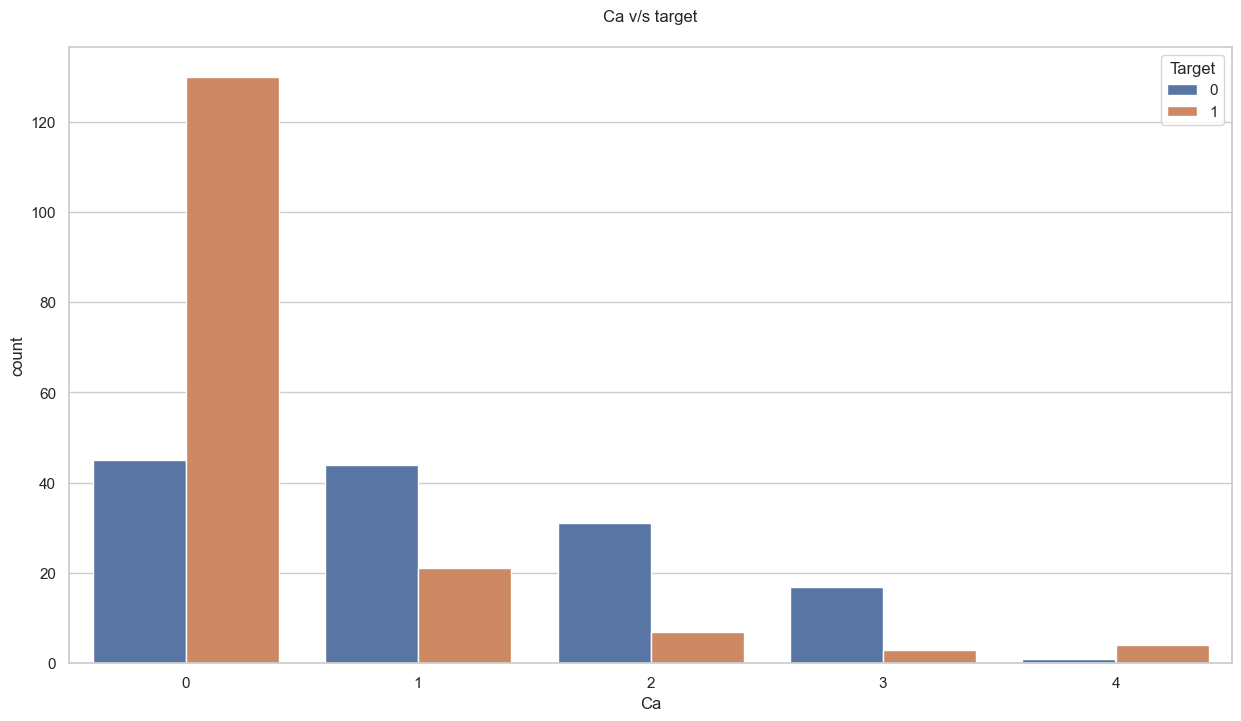

In [ ]:

sns.countplot(data= df, x='Ca',hue='Target')
plt.xlabel('Ca')
plt.title('Ca v/s target\n')

Text(0.5, 1.0, 'Thal v/s target\n')

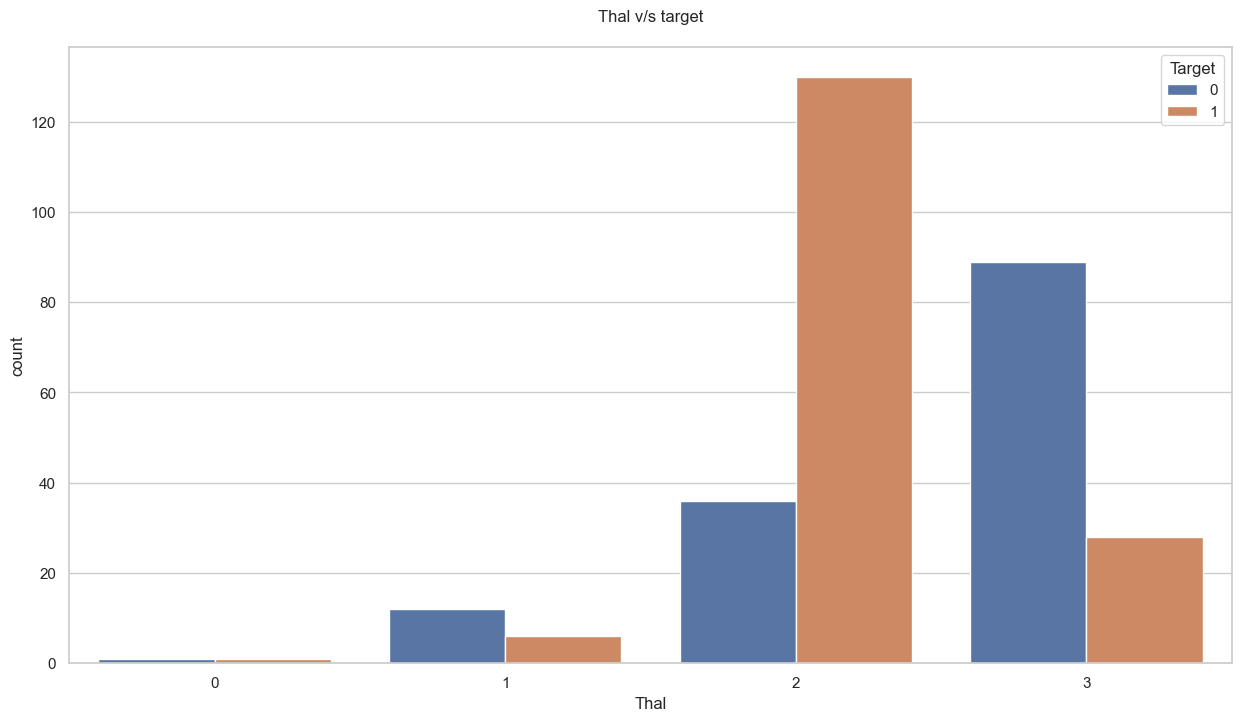

In [ ]:
sns.countplot(data= df, x='Thal',hue='Target')
plt.xlabel('Thal')
plt.title('Thal v/s target\n')

## Different Model Matrics

In [ ]:
x = df.drop('Target', axis=1)
y = df['Target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=62)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize and train the Logistic Regression model
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Make predictions
Y_pred_lr = lr.predict(x_test)

# Compute metrics
accuracy = round(accuracy_score(y_test, Y_pred_lr) * 100, 2)
precision = round(precision_score(y_test, Y_pred_lr) * 100, 2)
recall = round(recall_score(y_test, Y_pred_lr) * 100, 2)
f1 = round(f1_score(y_test, Y_pred_lr) * 100, 2)
conf_matrix = confusion_matrix(y_test, Y_pred_lr)
sensitivity = round(conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]) * 100, 2)
specificity = round(conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) * 100, 2)

print(f"Logistic Regression")
print(f"Accuracy: {accuracy} %")
print(f"Precision: {precision} %")
print(f"Recall (Sensitivity): {recall} %")
print(f"F1-Score: {f1} %")
print(f"Sensitivity: {sensitivity} %")
print(f"Specificity: {specificity} %")


Logistic Regression
Accuracy: 86.81 %
Precision: 88.0 %
Recall (Sensitivity): 88.0 %
F1-Score: 88.0 %
Sensitivity: 88.0 %
Specificity: 85.37 %


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naïve Bayes model
nb = GaussianNB()
nb.fit(x_train, y_train)

# Make predictions
Y_pred_nb = nb.predict(x_test)

# Compute metrics
accuracy = round(accuracy_score(y_test, Y_pred_nb) * 100, 2)
precision = round(precision_score(y_test, Y_pred_nb) * 100, 2)
recall = round(recall_score(y_test, Y_pred_nb) * 100, 2)
f1 = round(f1_score(y_test, Y_pred_nb) * 100, 2)
conf_matrix = confusion_matrix(y_test, Y_pred_nb)
sensitivity = round(conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]) * 100, 2)
specificity = round(conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) * 100, 2)

print(f"Naïve Bayes")
print(f"Accuracy: {accuracy} %")
print(f"Precision: {precision} %")
print(f"Recall (Sensitivity): {recall} %")
print(f"F1-Score: {f1} %")
print(f"Sensitivity: {sensitivity} %")
print(f"Specificity: {specificity} %")


Naïve Bayes
Accuracy: 84.62 %
Precision: 89.13 %
Recall (Sensitivity): 82.0 %
F1-Score: 85.42 %
Sensitivity: 82.0 %
Specificity: 87.8 %


In [ ]:
from sklearn.svm import SVC

# Initialize and train the Support Vector Machine model
svc = SVC()
svc.fit(x_train, y_train)

# Make predictions
Y_pred_svc = svc.predict(x_test)

# Compute metrics
accuracy = round(accuracy_score(y_test, Y_pred_svc) * 100, 2)
precision = round(precision_score(y_test, Y_pred_svc) * 100, 2)
recall = round(recall_score(y_test, Y_pred_svc) * 100, 2)
f1 = round(f1_score(y_test, Y_pred_svc) * 100, 2)
conf_matrix = confusion_matrix(y_test, Y_pred_svc)
sensitivity = round(conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]) * 100, 2)
specificity = round(conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) * 100, 2)

print(f"Support Vector Machine")
print(f"Accuracy: {accuracy} %")
print(f"Precision: {precision} %")
print(f"Recall (Sensitivity): {recall} %")
print(f"F1-Score: {f1} %")
print(f"Sensitivity: {sensitivity} %")
print(f"Specificity: {specificity} %")


Support Vector Machine
Accuracy: 57.14 %
Precision: 59.65 %
Recall (Sensitivity): 68.0 %
F1-Score: 63.55 %
Sensitivity: 68.0 %
Specificity: 43.9 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the K-nearest Neighbor model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# Make predictions
Y_pred_knn = knn.predict(x_test)

# Compute metrics
accuracy = round(accuracy_score(y_test, Y_pred_knn) * 100, 2)
precision = round(precision_score(y_test, Y_pred_knn) * 100, 2)
recall = round(recall_score(y_test, Y_pred_knn) * 100, 2)
f1 = round(f1_score(y_test, Y_pred_knn) * 100, 2)
conf_matrix = confusion_matrix(y_test, Y_pred_knn)
sensitivity = round(conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]) * 100, 2)
specificity = round(conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) * 100, 2)

print(f"K-nearest Neighbor")
print(f"Accuracy: {accuracy} %")
print(f"Precision: {precision} %")
print(f"Recall (Sensitivity): {recall} %")
print(f"F1-Score: {f1} %")
print(f"Sensitivity: {sensitivity} %")
print(f"Specificity: {specificity} %")


K-nearest Neighbor
Accuracy: 56.04 %
Precision: 59.62 %
Recall (Sensitivity): 62.0 %
F1-Score: 60.78 %
Sensitivity: 62.0 %
Specificity: 48.78 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

# Make predictions
Y_pred_dt = dt.predict(x_test)

# Compute metrics
accuracy = round(accuracy_score(y_test, Y_pred_dt) * 100, 2)
precision = round(precision_score(y_test, Y_pred_dt) * 100, 2)
recall = round(recall_score(y_test, Y_pred_dt) * 100, 2)
f1 = round(f1_score(y_test, Y_pred_dt) * 100, 2)
conf_matrix = confusion_matrix(y_test, Y_pred_dt)
sensitivity = round(conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]) * 100, 2)
specificity = round(conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) * 100, 2)

print(f"Decision Tree")
print(f"Accuracy: {accuracy} %")
print(f"Precision: {precision} %")
print(f"Recall (Sensitivity): {recall} %")
print(f"F1-Score: {f1} %")
print(f"Sensitivity: {sensitivity} %")
print(f"Specificity: {specificity} %")


Decision Tree
Accuracy: 75.82 %
Precision: 83.33 %
Recall (Sensitivity): 70.0 %
F1-Score: 76.09 %
Sensitivity: 70.0 %
Specificity: 82.93 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Make predictions
Y_pred_rf = rf.predict(x_test)

# Compute metrics
accuracy = round(accuracy_score(y_test, Y_pred_rf) * 100, 2)
precision = round(precision_score(y_test, Y_pred_rf) * 100, 2)
recall = round(recall_score(y_test, Y_pred_rf) * 100, 2)
f1 = round(f1_score(y_test, Y_pred_rf) * 100, 2)
conf_matrix = confusion_matrix(y_test, Y_pred_rf)
sensitivity = round(conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]) * 100, 2)
specificity = round(conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) * 100, 2)

print(f"Random Forest")
print(f"Accuracy: {accuracy} %")
print(f"Precision: {precision} %")
print(f"Recall (Sensitivity): {recall} %")
print(f"F1-Score: {f1} %")
print(f"Sensitivity: {sensitivity} %")
print(f"Specificity: {specificity} %")


Random Forest
Accuracy: 85.71 %
Precision: 89.36 %
Recall (Sensitivity): 84.0 %
F1-Score: 86.6 %
Sensitivity: 84.0 %
Specificity: 87.8 %


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naïve Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-nearest Neighbor': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Initialize the results dictionary
results = {
    'Model': [],
    'Accuracy (%)': [],
    'Precision (%)': [],
    'Recall (%)': [],
    'F1-Score (%)': [],
    'Sensitivity (%)': [],
    'Specificity (%)': []
}

# Train, predict and calculate metrics for each model
for model_name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Make predictions
    Y_pred = model.predict(x_train)

    # Compute metrics
    accuracy = round(accuracy_score(y_train, Y_pred) * 100, 2)
    precision = round(precision_score(y_train, Y_pred) * 100, 2)
    recall = round(recall_score(y_train, Y_pred) * 100, 2)
    f1 = round(f1_score(y_train, Y_pred) * 100, 2)
    conf_matrix = confusion_matrix(y_train, Y_pred)
    sensitivity = round(conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]) * 100, 2)
    specificity = round(conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) * 100, 2)

    # Append results to the dictionary
    results['Model'].append(model_name)
    results['Accuracy (%)'].append(accuracy)
    results['Precision (%)'].append(precision)
    results['Recall (%)'].append(recall)
    results['F1-Score (%)'].append(f1)
    results['Sensitivity (%)'].append(sensitivity)
    results['Specificity (%)'].append(specificity)

# Convert results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Print the results in table format
print(results_df)


                    Model  Accuracy (%)  Precision (%)  Recall (%)  \
0     Logistic Regression         83.96          81.89       90.43   
1             Naïve Bayes         82.08          81.30       86.96   
2  Support Vector Machine         65.57          64.19       82.61   
3      K-nearest Neighbor         78.77          78.69       83.48   
4           Decision Tree        100.00         100.00      100.00   
5           Random Forest        100.00         100.00      100.00   

   F1-Score (%)  Sensitivity (%)  Specificity (%)  
0         85.95            90.43            76.29  
1         84.03            86.96            76.29  
2         72.24            82.61            45.36  
3         81.01            83.48            73.20  
4        100.00           100.00           100.00  
5        100.00           100.00           100.00  


In [1]:
from sklearn import datasets
import pandas as pd

diabetes = datasets.load_diabetes()

diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

dataset_length = len(diabetes.data)
num_samples, num_features = diabetes.data.shape

print(diabetes_df.head(442))
print(f"Dataset length: {dataset_length} samples")
print(f"Dataset shape: {num_samples} samples, {num_features} features")

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.0176

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9960\2941332957.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load the Iris dataset
iris = datasets.load_iris()

# Step 2: Convert the dataset into a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Optional: Add the target (species) column to the DataFrame
iris_df['species'] = iris.target

# Step 3: Show the first few rows using head()
print(iris_df.head())
# iris_df.head()

# Step 3: Prepare features (X) and target labels (y)
X = iris.data   # Features (sepal length, sepal width, petal length, petal width)
y = iris.target # Target (species)

# Step 4: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Optionally scale the features (useful for models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train a Logistic Regression model
model = RandomForestClassifier()
# model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

# Step 7: Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Step 8: Evaluate the model (accuracy score)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
Accuracy: 100.00%
